# Predictive model

Juan Pablo Echeagaray González

24/10/2021

## Logistic regression

### Naïve logistic regression 

In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
from zipfile import ZipFile
import pickle

In [27]:
with ZipFile('data\\clean_data.zip') as zip:
    with zip.open(zip.namelist()[0]) as data:
        df = pd.read_pickle(data)

In [28]:
df.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,UCI
1,2021-10-23,z49a69,1,12,23,1,23,23,4,2,...,0,0,1,2,97,2,97,2,99,1
16,2021-10-23,z166d5,1,12,1,1,1,1,1,2,...,0,0,2,1,1,2,97,3,99,2
21,2021-10-23,z388cd,1,12,29,0,15,21,117,2,...,0,0,1,2,97,2,97,1,99,2
22,2021-10-23,z4533d,1,12,29,1,21,21,117,2,...,0,0,2,2,97,2,97,6,99,2
27,2021-10-23,z4494e,2,12,8,1,8,8,37,2,...,0,0,1,1,1,2,97,3,99,2


In [29]:
variables = ['INTUBADO', 'SEXO', 'EDAD', 'NEUMONIA', 'EPOC', 'TABAQUISMO', 'ASMA', 'OBESIDAD', 'DIABETES', 'HIPERTENSION',
            'CARDIOVASCULAR', 'EMBARAZO', 'INMUSUPR', 'RENAL_CRONICA']
variables.remove('INTUBADO')
response = 'INTUBADO'

In [30]:
X_train, X_test, y_train, y_test = train_test_split(df[variables], df[response], test_size=0.3, random_state=42)

In [31]:
model = LogisticRegression(max_iter=1000, class_weight='auto')
model.fit(X_train, y_train)

LogisticRegression(class_weight='auto', max_iter=1000)

In [32]:
predictions = model.predict(X_test)

In [33]:
coef = model.coef_[0]
for i, v in enumerate(variables):
    print(f'{v:<10} {coef[i]:.5f}')

SEXO       -0.26612
EDAD       0.29696
NEUMONIA   1.43352
EPOC       -0.16672
TABAQUISMO -0.02945
ASMA       -0.02886
OBESIDAD   0.33276
DIABETES   0.06015
HIPERTENSION 0.08468
CARDIOVASCULAR 0.03056
EMBARAZO   -0.44855
INMUSUPR   0.16394
RENAL_CRONICA -0.14334


In [34]:
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy * 100:.5f} %')

Accuracy: 89.70302 %


A very naïve approach that generates a model with a precision of nearly 90%, I still want to improve this value.

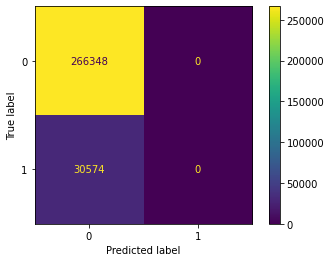

In [35]:
# Confusion matrix
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_knn.classes_)
disp.plot()

In [37]:
with open('Models\\model_naive.pkl', 'wb') as f:
    pickle.dump(model, f)

### Logistic regression with artificial data

In [40]:
from imblearn.over_sampling import SMOTE

In [41]:
variables = ['INTUBADO', 'SEXO', 'EDAD', 'NEUMONIA', 'EPOC', 'TABAQUISMO', 'ASMA', 'OBESIDAD', 'DIABETES', 'HIPERTENSION',
            'CARDIOVASCULAR', 'EMBARAZO', 'INMUSUPR', 'RENAL_CRONICA']
variables.remove('INTUBADO')
response = 'INTUBADO'
X_train, X_test, y_train, y_test = train_test_split(df[variables], df[response], test_size=0.3, random_state=42)

In [42]:
os = SMOTE(random_state=42)
X_train, y_train = os.fit_resample(X_train, y_train)

In [43]:
model_artificial = LogisticRegression(max_iter=1000, class_weight='auto')
model_artificial.fit(X_train, y_train)

LogisticRegression(class_weight='auto', max_iter=1000)

In [44]:
predictions_artificial = model_artificial.predict(X_test)

In [45]:
coef = model_artificial.coef_[0]
for i, v in enumerate(variables):
    print(f'{v:<10} {coef[i]:.5f}')

SEXO       -0.27782
EDAD       0.33420
NEUMONIA   1.43192
EPOC       -0.18461
TABAQUISMO -0.05952
ASMA       -0.11193
OBESIDAD   0.33566
DIABETES   0.06531
HIPERTENSION 0.09745
CARDIOVASCULAR 0.02570
EMBARAZO   -0.56561
INMUSUPR   0.11969
RENAL_CRONICA -0.14332


In [46]:
accuracy = accuracy_score(y_test, predictions_artificial)
print(f'Accuracy: {accuracy * 100:.5f} %')

Accuracy: 52.50436 %


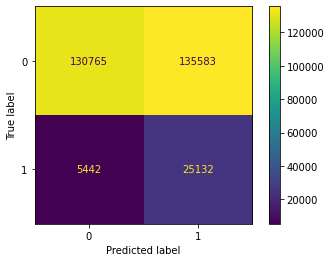

In [47]:
cm = confusion_matrix(y_test, predictions_artificial)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_artificial.classes_)
disp.plot()

In [48]:
with open('Models\\model_artificial.pkl', 'wb') as f:
    pickle.dump(model_artificial, f)

### Logistic regression with hyperparameters

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
model_hyp = LogisticRegression()

In [51]:
X_train, X_test, y_train, y_test = train_test_split(df[variables], df[response], test_size=0.3, random_state=42)

In [52]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000], 
            'penalty': ['l1', 'l2'],
            'solver': ['liblinear', 'saga'],
            'max_iter': [100, 1000, 2500, 5000]}


In [53]:
clf = GridSearchCV(model_hyp, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [54]:
best_clf = clf.fit(X_train, y_train)

In [55]:
best_clf.best_estimator_

LogisticRegression(C=0.01, penalty='l1', solver='liblinear')

In [56]:
predictions = best_clf.predict(X_test)

In [57]:
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy * 100:.5f} %')

Accuracy: 89.70302 %


In [58]:
coef = best_clf.best_estimator_.coef_[0]
for i, v in enumerate(variables):
    print(f'{v:<10} {coef[i]:.5f}')

SEXO       -0.26402
EDAD       0.23449
NEUMONIA   1.42218
EPOC       -0.11181
TABAQUISMO -0.00764
ASMA       0.00000
OBESIDAD   0.32191
DIABETES   0.05619
HIPERTENSION 0.08475
CARDIOVASCULAR 0.00000
EMBARAZO   -0.18018
INMUSUPR   0.09483
RENAL_CRONICA -0.10659


Pretty similar coefficients, and the same precision. Yet they fail in a lot of cases

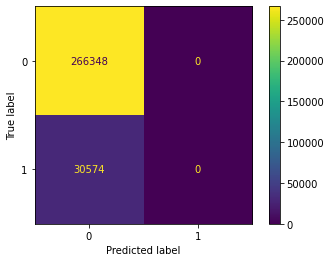

In [59]:
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_clf.best_estimator_.classes_)
disp.plot()

In [63]:
with open('Models\\model_hyp.pkl', 'wb') as f:
    pickle.dump(best_clf, f)

### Logistic regression with hyperparameters and artificial data

In [60]:
model_frankenstein = LogisticRegression()

In [61]:
variables = ['INTUBADO', 'SEXO', 'EDAD', 'NEUMONIA', 'EPOC', 'TABAQUISMO', 'ASMA', 'OBESIDAD', 'DIABETES', 'HIPERTENSION',
            'CARDIOVASCULAR', 'EMBARAZO', 'INMUSUPR', 'RENAL_CRONICA']
variables.remove('INTUBADO')
response = 'INTUBADO'
X_train, X_test, y_train, y_test = train_test_split(df[variables], df[response], test_size=0.3, random_state=42)

In [62]:
os = SMOTE(random_state=42)
X_train, y_train = os.fit_resample(X_train, y_train)

In [64]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000], 
            'penalty': ['l1', 'l2'],
            'solver': ['liblinear', 'saga'],
            'max_iter': [100, 1000, 2500, 5000]}

In [65]:
clf = GridSearchCV(model_hyp, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [66]:
best_clf = clf.fit(X_train, y_train)

In [67]:
best_clf.best_estimator_

LogisticRegression(C=0.01, max_iter=1000, penalty='l1', solver='liblinear')

In [68]:
predictions = best_clf.predict(X_test)

In [70]:
coef = best_clf.best_estimator_.coef_[0]
for i, v in enumerate(variables):
    print(f'{v:<10} {coef[i]:.5f}')

SEXO       -0.27745
EDAD       0.32029
NEUMONIA   1.42996
EPOC       -0.17245
TABAQUISMO -0.05430
ASMA       -0.09396
OBESIDAD   0.33291
DIABETES   0.06447
HIPERTENSION 0.09746
CARDIOVASCULAR 0.01793
EMBARAZO   -0.51686
INMUSUPR   0.10373
RENAL_CRONICA -0.13517


In [69]:
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy * 100:.5f} %')

Accuracy: 52.46934 %


I don't really think I should say something. I will have to keep trying

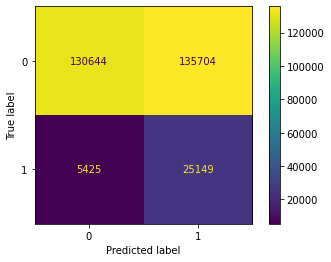

In [71]:
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_clf.best_estimator_.classes_)
disp.plot()

In [ ]:
with open('Models\\model_frankenstein.pkl', 'wb') as f:
    pickle.dump(best_clf, f)

## k Nearest Neighbors

In [1]:
from sklearn.neighbors import KNeighborsClassifier

In [5]:
model_knn = KNeighborsClassifier(n_neighbors=3)

In [4]:
with ZipFile('data\\clean_data.zip') as zip:
    with zip.open(zip.namelist()[0]) as data:
        df = pd.read_pickle(data)

In [6]:
variables = ['INTUBADO', 'SEXO', 'EDAD', 'NEUMONIA', 'EPOC', 'TABAQUISMO', 'ASMA', 'OBESIDAD', 'DIABETES', 'HIPERTENSION',
            'CARDIOVASCULAR', 'EMBARAZO', 'INMUSUPR', 'RENAL_CRONICA']
variables.remove('INTUBADO')
response = 'INTUBADO'
X_train, X_test, y_train, y_test = train_test_split(df[variables], df[response], test_size=0.3, random_state=42)

In [7]:
model_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [8]:
predictions_knn = model_knn.predict(X_test)

In [9]:
accuracy = accuracy_score(y_test, predictions_knn)
print(f'Accuracy: {accuracy * 100:.5f} %')

Accuracy: 86.59951 %


In [10]:
positives = np.count_nonzero(y_test == 1)
model_positives = np.count_nonzero(predictions_knn == 1)
print(f'Positives: {positives}')
print(f'Model positives: {model_positives}')

Positives: 30574
Model positives: 13417


In [11]:
negatives = np.count_nonzero(y_test == 0)
model_negatives = np.count_nonzero(predictions_knn == 0)
print(f'Negatives: {negatives}')
print(f'Model negatives: {model_negatives}')

Negatives: 266348
Model negatives: 283505


In [12]:
import pickle
with open('Models\\model_knn.pkl', 'wb') as f:
    pickle.dump(model_knn, f)

I think so far this is the best model, it actually predicts intubations

### Confusion matrix

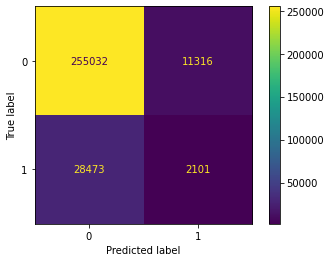

In [23]:
cm = confusion_matrix(y_test, predictions_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_knn.classes_)
disp.plot()